<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forcasting fundamentals with tensorflow + milestone project 3: BitPredict💹💰

## Get Data 

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-10-03 14:00:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-10-03 14:00:37 (51.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time-series with pandas

In [2]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns= {'Closing Price (USD)':'price'})
bitcoin_prices

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


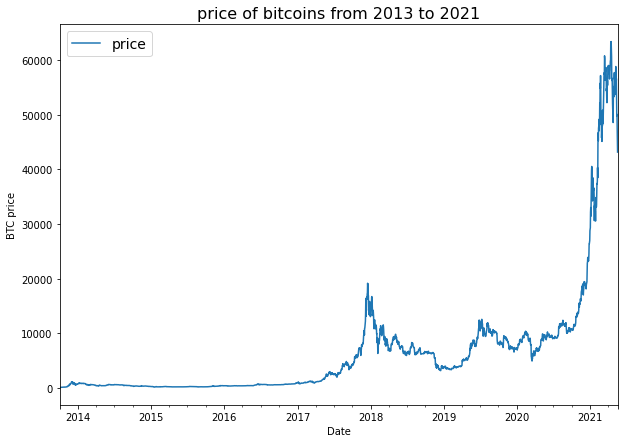

In [4]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10,7))
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.legend(fontsize= 14)


## importing time series data with python CSV module

In [5]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter= ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'date')

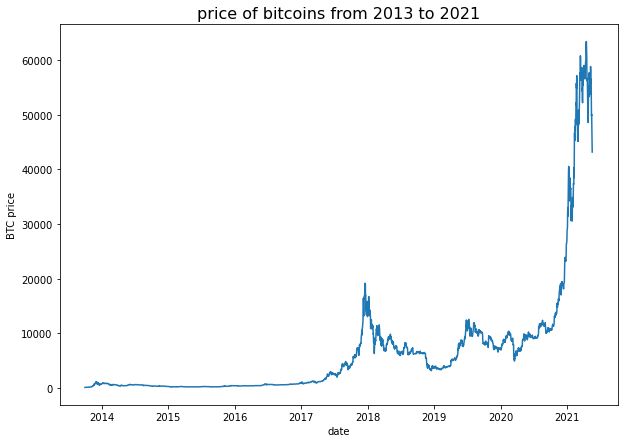

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.xlabel('date')

## Format data part 1: create train and test set of our time series data

### creating train and test sets with time series data( the wrong way)

In [7]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['price'].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( timesteps, prices, test_size=0.2, random_state=42)

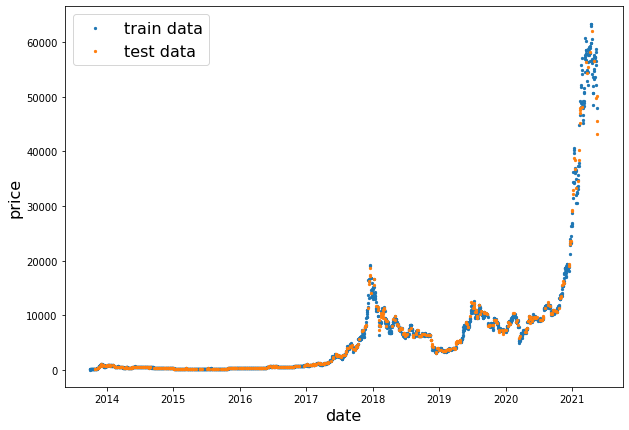

In [9]:
plt.figure(figsize= (10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create train and test set for time series dataset ( the right way)

In [10]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size] , prices[:split_size]

X_test, y_test = timesteps[split_size:] , prices[split_size:]



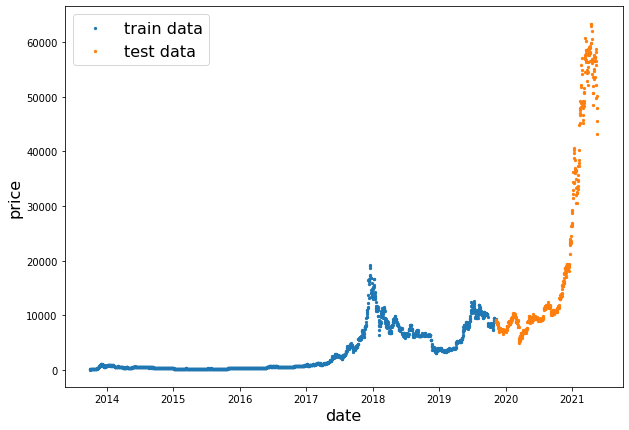

In [11]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create a ploting function

In [12]:
def plot_time_series(timesteps, values, format = '.', start = 0 , end = None , label= None):

  plt.plot(timesteps[start:end],values[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize= 16)

  plt.grid(True)

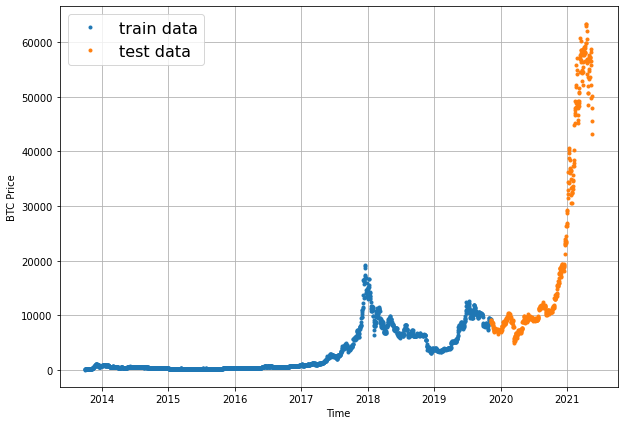

In [13]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train , values = y_train , label= 'train data')
plot_time_series(X_test, y_test , label= 'test data')

## modelling experiment

### model 0: Naive Forecast(baseline)

In [14]:
naive_forecast = y_test[:-1]

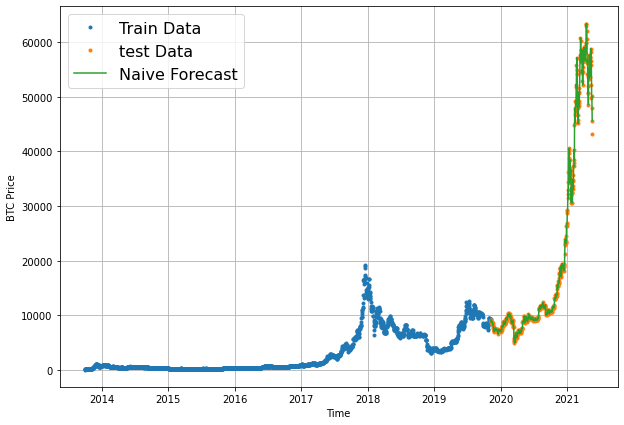

In [15]:
plt.figure(figsize= (10,7))
plot_time_series(X_train,y_train, label= 'Train Data')
plot_time_series(X_test , y_test, label= 'test Data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format= '-', label= 'Naive Forecast')

## Evaluating the time series model

In [16]:
import tensorflow as tf

In [17]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae= tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [19]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [20]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.5165248,
 'mase': 0.99957}

In [21]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [22]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [23]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>)

## Format data part 2: Windowing the dataset

In [24]:
print(f'we want to use this {btc_price[:7]} to predict this {btc_price[7]}')

we want to use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]


In [27]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) +1, axis=0))
print(f' window: {tf.squeeze(test_window)} -->  label: {tf.squeeze(test_label)}') 

 window: [1 2 3 4 5 6 7] -->  label: 8


In [28]:
import numpy as np

def make_windows(x , window_size=WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon - 1)),axis=0).T

  #print(f'window_indexes: \n{window_indexes, window_indexes.shape}')
  windowed_array =  x[window_indexes]

  windows,labels = get_labelled_windows(windowed_array, horizon= horizon)
  return windows,labels


In [29]:
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

In [30]:
for i in range(3):
  print(f'windows: {full_windows[i]} --> labels: {full_labels[i]}')

windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> labels: [123.033]
windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> labels: [124.049]
windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> labels: [125.96116]


## Turning windows into train and test set

In [31]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels , test_labels

In [32]:
train_windows,test_windows,train_labels,test_labels = make_train_test_split(full_windows,full_labels)

## making a modelling checkpoint callback

In [33]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only= True)

## model 1 : Dense model (window = 7, horizon = 1)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
],name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x =train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 46ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5828 - val_mae: 2279.5828 - val_mse: 12772095.0000
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9062 - val_loss: 1005.9864 - val_mae: 1005.9864 - val_mse: 3441759.2500
Epoch 3/100
18/18 [==============================] - 1s 29ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0312 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
Epoch 4/100
18/18 [==============================] - 1s 34ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 165.0900 - mae: 165.0900 - mse: 145490.8750 - val_loss: 895.2405 - val_mae: 895.2405 - val_mse: 2564606.2500
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 158.5

In [35]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5322 - mae: 662.5322 - mse: 1358192.1250


[662.5322265625, 662.5322265625, 1358192.125]

In [36]:
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]

## Making forecast with a model (on the test dataset )

In [37]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [38]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
       8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>

In [39]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [40]:
model_1_results

{'mae': 568.5498,
 'mse': 1172587.6,
 'rmse': 23.844282,
 'mape': 2.549229,
 'mase': 0.99878454}

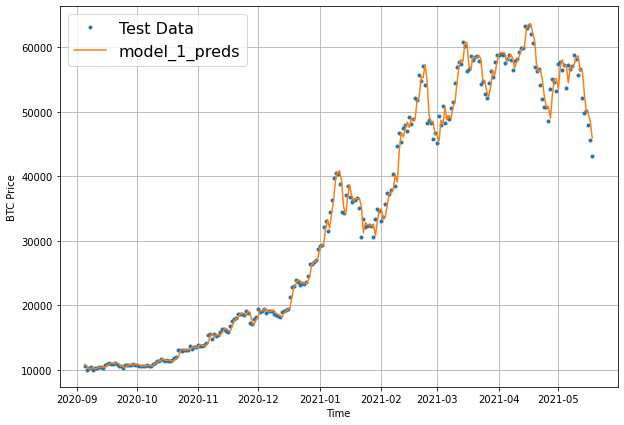

In [41]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset, label = "Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")


## Model 2: Dense(window = 30, horizon = 1)

In [42]:
HORIZON = 1
WINDOW_SIZE = 30

In [43]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [44]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels =  full_labels,
                                                                               test_split = 0.2)

In [45]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose =0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [46]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 658.0289


658.0288696289062

In [47]:
model_2 = tf.keras.models.load_model('model_experiment/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 608.8480


608.8480224609375

In [48]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)


In [50]:
model_2_results

{'mae': 608.84814,
 'mse': 1284314.4,
 'rmse': 24.674849,
 'mape': 2.7680664,
 'mase': 1.0642724}

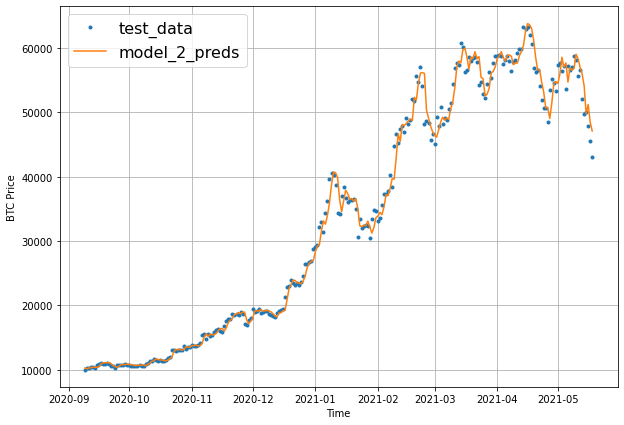

In [51]:
offset =300

plt.figure(figsize= (10,7))

plot_time_series(timesteps= X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

## model 3 : Dense(window =30, horizon = 7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = make_windows(prices, window_size= WINDOW_SIZE , horizon =  HORIZON)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels)

In [54]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size= 128,
            epochs =100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])


Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 1476.6801 - val_loss: 3088.5391
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 552.8872 - val_loss: 2462.5020
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 435.1955 - val_loss: 2282.7729
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 391.9522 - val_loss: 1980.5011
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 357.7267 - val_loss: 1985.0293
Epoch 6/100
18/18 [==============================] - 0s 29ms/step - loss: 332.7856 - val_loss: 1754.1522
Epoch 7/100
18/18 [==============================] - 1s 43ms/step - loss: 309.8981 - val_loss: 1590.3005
Epoch 8/100
18/18 [==============================] - 1s 30ms/step - loss: 302.8700 - val_loss: 1565.3329
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 293.6388 - val_loss: 1611.2915
Epoch 10/100
18/18 [==============================] - 0s

In [55]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1322.7781


1322.778076171875

In [56]:
model_3 = tf.keras.models.load_model('model_experiment/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1228.1417


1228.1417236328125

In [57]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9233.328 , 9332.702 , 9363.651 , 9442.775 , 9401.978 , 9414.001 ,
        9280.01  ],
       [8911.084 , 9065.984 , 9113.08  , 9026.601 , 8990.093 , 9000.148 ,
        9053.433 ],
       [8848.506 , 9018.2295, 9006.146 , 8934.578 , 8929.888 , 8856.351 ,
        8958.367 ]], dtype=float32)>

In [58]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred =  model_3_preds)

model_3_results

{'mae': array([  559.42004 ,   276.0053  ,   298.20258 ,   408.06152 ,
          431.32047 ,   526.28064 ,   542.41644 ,   459.79108 ,
          490.63736 ,   631.6582  ,   802.51654 ,   731.79333 ,
          684.06476 ,   789.71857 ,   563.4593  ,   271.9013  ,
          231.86858 ,   258.64767 ,   277.65277 ,   291.5478  ,
          105.425575,   132.63156 ,   205.97643 ,   262.20816 ,
          169.8651  ,   165.05127 ,   110.21959 ,    83.64655 ,
          115.86182 ,   152.87025 ,   279.98862 ,   380.96127 ,
          280.21414 ,   271.9101  ,   264.43088 ,   261.91315 ,
          330.29108 ,   242.21861 ,   253.72746 ,   245.38596 ,
          412.562   ,   128.63539 ,    88.56452 ,    92.15639 ,
          100.39704 ,   102.41455 ,    74.52804 ,    94.00349 ,
           84.86837 ,    76.64781 ,   108.49679 ,   144.869   ,
          187.69133 ,   162.5261  ,   265.83133 ,   391.21323 ,
          552.2943  ,   541.77313 ,   522.20886 ,   523.98157 ,
          430.13052 ,   276.80893

## make our evaluation function work for larger horizons

In [59]:
tf.reduce_mean(model_3_results['mae']).numpy()

1228.1416

In [60]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim >0:
    mae = tf.reduce_mean(mae)
    mse =tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [61]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1228.1416,
 'mse': 5323686.5,
 'rmse': 29.518578,
 'mape': 5.4698334,
 'mase': 2.1854093}

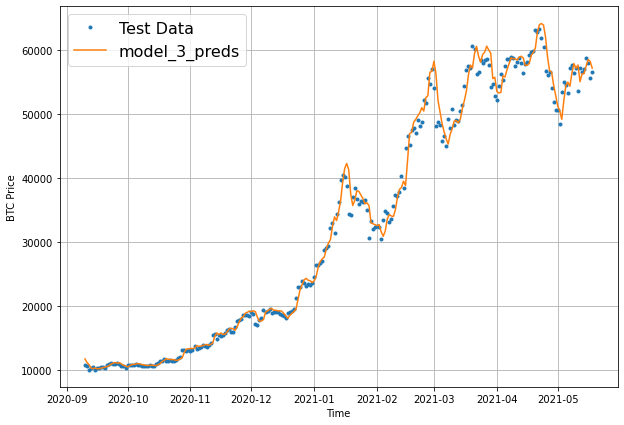

In [62]:
offset = 300

plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = offset, label = 'Test Data')

plot_time_series(timesteps =X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1) ,start = offset,format='-', label = 'model_3_preds' )

## Which of our model performing best so far

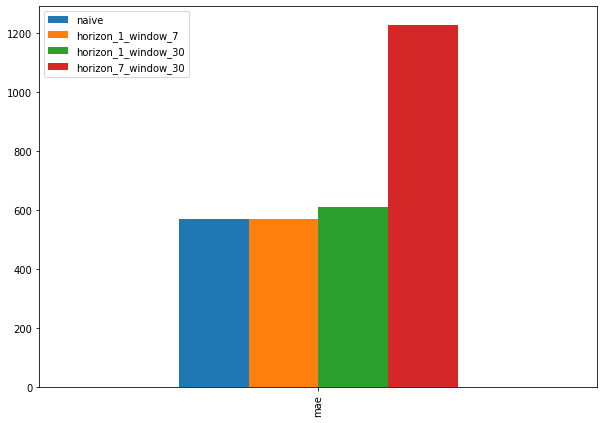

In [63]:
pd.DataFrame({'naive':naive_results['mae'],
              'horizon_1_window_7':model_1_results['mae'],
              'horizon_1_window_30':model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']},index = ['mae']).plot(figsize=(10,7),kind = "bar");

## model 4: Conv1D

In [64]:
HORIZON = 1
WINDOW_SIZE = 7

full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE,horizon=HORIZON)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [66]:
train_windows[0].shape

(7,)

In [67]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [68]:
expand_dims_layer  = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [69]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis= 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides=1, padding= 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
] , name = "model_4_conv1d")

model_4.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows,
          train_labels,
          batch_size = 128,
          epochs = 100,
          verbose = 1,
          validation_data = (test_windows, test_labels),
          callbacks = [create_model_checkpoint(model_name = 'model_4_conv1d') ])

Epoch 1/100
18/18 [==============================] - 1s 51ms/step - loss: 1207.3885 - val_loss: 2320.5461
Epoch 2/100
18/18 [==============================] - 1s 42ms/step - loss: 316.2140 - val_loss: 1467.3309
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 192.6844 - val_loss: 1164.7460
Epoch 4/100
18/18 [==============================] - 1s 42ms/step - loss: 177.3536 - val_loss: 981.6823
Epoch 5/100
18/18 [==============================] - 1s 42ms/step - loss: 172.3469 - val_loss: 960.8795
Epoch 6/100
18/18 [==============================] - 1s 42ms/step - loss: 171.9752 - val_loss: 950.1938
Epoch 7/100
18/18 [==============================] - 1s 41ms/step - loss: 167.1943 - val_loss: 943.3042
Epoch 8/100
18/18 [==============================] - 1s 41ms/step - loss: 163.5994 - val_loss: 905.5258
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 162.5453 - val_loss: 929.7834
Epoch 10/100
18/18 [==============================] - 1s 57ms

In [70]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 624.1893


624.1892700195312

In [71]:
model_4 = tf.keras.models.load_model("model_experiment/model_4_conv1d/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.0326


569.0325927734375

In [72]:
model_4_preds = make_preds(model_4, test_windows)

model_4_preds[:4]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([8847.293, 8757.503, 8997.469, 8762.801], dtype=float32)>

In [73]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 569.03265,
 'mse': 1169841.0,
 'rmse': 23.854404,
 'mape': 2.5515256,
 'mase': 0.9996328}

## model 5: RNN (LSTM)

In [74]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x, axis= 1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x =layers.LSTM(128, activation = 'relu')(x)
#x = layers.Dense(32, activation = 'relus')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs= inputs, outputs = output , name = 'model_5_LSTM')

model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2581.3245 

18/18 [==============================] - 5s 229ms/step - loss: 2323.6123 - val_loss: 9224.3506
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 905.3286 

18/18 [==============================] - 2s 126ms/step - loss: 695.4956 - val_loss: 1485.8942
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 266.3532

18/18 [==============================] - 2s 139ms/step - loss: 237.3010 - val_loss: 1298.9436
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 192.6128

18/18 [==============================] - 2s 120ms/step - loss: 181.9182 - val_loss: 966.6407
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4021 - val_loss: 970.9384
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 170.0443

18/18 [==============================] - 2s 118ms/step - loss: 172.3319 - val_loss: 891.5209
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 168.9708 - val_loss: 968.6377
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 169.5318 - val_loss: 963.4456
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 167.5760 - val_loss: 956.5829
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 166.3443 - val_loss: 936.8956
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 165.4762 - val_loss: 909.1110
Epoch 12/100
12/18 [===================>..........] - ETA: 0s - loss: 170.8306

18/18 [==============================] - 2s 118ms/step - loss: 169.9951 - val_loss: 891.2327
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 160.3806 - val_loss: 898.5595
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6484 - val_loss: 927.9266
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 167.6508 - val_loss: 982.9256
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 160.4521 - val_loss: 916.0458
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 153.8805 - val_loss: 928.6927
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 160.4999

18/18 [==============================] - 2s 141ms/step - loss: 152.1556 - val_loss: 865.6219
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 148.8319 - val_loss: 876.9328
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 153.3520

18/18 [==============================] - 2s 120ms/step - loss: 149.6801 - val_loss: 831.2376
Epoch 21/100
11/18 [=================>............] - ETA: 0s - loss: 153.4114

18/18 [==============================] - 2s 117ms/step - loss: 145.7330 - val_loss: 821.0629
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 143.9433 - val_loss: 821.2911
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 143.1268 - val_loss: 837.1895
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 140.3252

18/18 [==============================] - 2s 138ms/step - loss: 141.0378 - val_loss: 808.0547
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 142.0081

18/18 [==============================] - 2s 122ms/step - loss: 139.0068 - val_loss: 787.0112
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 135.4655

18/18 [==============================] - 2s 118ms/step - loss: 137.9395 - val_loss: 769.2203
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 136.4498 - val_loss: 772.5977
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 134.0706

18/18 [==============================] - 2s 118ms/step - loss: 135.2745 - val_loss: 751.0115
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 135.5958 - val_loss: 759.8718
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 138.2377 - val_loss: 789.2983
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 135.2388

18/18 [==============================] - 2s 144ms/step - loss: 133.4514 - val_loss: 730.3293
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 129.2459 - val_loss: 730.9674
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 129.6380

18/18 [==============================] - 2s 120ms/step - loss: 128.6682 - val_loss: 726.6902
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 134.7901

18/18 [==============================] - 2s 118ms/step - loss: 128.9641 - val_loss: 708.2340
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 127.4486

18/18 [==============================] - 2s 120ms/step - loss: 126.4375 - val_loss: 702.6016
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 124.1017

18/18 [==============================] - 2s 142ms/step - loss: 125.8648 - val_loss: 696.0234
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 122.4251

18/18 [==============================] - 2s 122ms/step - loss: 124.2744 - val_loss: 692.3998
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 131.0452

18/18 [==============================] - 2s 120ms/step - loss: 123.4617 - val_loss: 682.3129
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 124.4908 - val_loss: 689.1117
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 123.6601 - val_loss: 688.7414
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 124.3209

18/18 [==============================] - 2s 119ms/step - loss: 121.6996 - val_loss: 673.3080
Epoch 42/100
12/18 [===================>..........] - ETA: 0s - loss: 119.8762

18/18 [==============================] - 2s 143ms/step - loss: 121.2662 - val_loss: 665.5682
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 116.9011

18/18 [==============================] - 2s 121ms/step - loss: 121.1914 - val_loss: 663.4371
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3492 - val_loss: 666.4625
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 116.5398

18/18 [==============================] - 2s 119ms/step - loss: 119.4222 - val_loss: 653.1441
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 124.5274

18/18 [==============================] - 2s 140ms/step - loss: 119.1475 - val_loss: 649.3669
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 119.5113 - val_loss: 650.3450
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 114.8167

18/18 [==============================] - 2s 121ms/step - loss: 117.9849 - val_loss: 643.7015
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3458 - val_loss: 649.1431
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 119.0112 - val_loss: 658.5665
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3833 - val_loss: 673.2418
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0016 - val_loss: 644.5724
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 115.0004

18/18 [==============================] - 2s 120ms/step - loss: 117.5012 - val_loss: 632.1457
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 117.3330 - val_loss: 637.2055
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 121.5831

18/18 [==============================] - 2s 122ms/step - loss: 115.8615 - val_loss: 627.7058
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1814 - val_loss: 648.4813
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 125.8361 - val_loss: 648.9831
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4787 - val_loss: 630.3375
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6559 - val_loss: 628.4244
Epoch 60/100
13/18 [====================>.........] - ETA: 0s - loss: 115.3895

18/18 [==============================] - 2s 143ms/step - loss: 114.8021 - val_loss: 620.0607
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3845 - val_loss: 633.4195
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7735 - val_loss: 653.0529
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 118.5447 - val_loss: 622.3017
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3439 - val_loss: 646.4648
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5774 - val_loss: 621.8207
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5758 - val_loss: 625.8535
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 111.2375

18/18 [==============================] - 2s 124ms/step - loss: 114.3274 - val_loss: 618.1777
Epoch 68/100
11/18 [=================>............] - ETA: 0s - loss: 113.9696

18/18 [==============================] - 2s 119ms/step - loss: 115.8874 - val_loss: 610.0667
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 118.1946 - val_loss: 630.6259
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 117.6780 - val_loss: 613.6976
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6891 - val_loss: 628.7469
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3159 - val_loss: 613.3113
Epoch 73/100
13/18 [====================>.........] - ETA: 0s - loss: 112.0070

18/18 [==============================] - 2s 119ms/step - loss: 112.2513 - val_loss: 607.5436
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5405 - val_loss: 612.9193
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6243 - val_loss: 680.9974
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3978 - val_loss: 627.7791
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0701 - val_loss: 677.3135
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6408 - val_loss: 638.9863
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 111.3614

18/18 [==============================] - 2s 144ms/step - loss: 113.8102 - val_loss: 603.6312
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 111.6164 - val_loss: 621.9382
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7110 - val_loss: 620.0795
Epoch 82/100
12/18 [===================>..........] - ETA: 0s - loss: 119.6738

18/18 [==============================] - 2s 122ms/step - loss: 114.4341 - val_loss: 598.3356
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8585 - val_loss: 607.5803
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8406 - val_loss: 602.6411
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2613 - val_loss: 627.6544
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9645 - val_loss: 619.5224
Epoch 87/100
13/18 [====================>.........] - ETA: 0s - loss: 118.0084

18/18 [==============================] - 2s 120ms/step - loss: 113.8286 - val_loss: 598.2933
Epoch 88/100
12/18 [===================>..........] - ETA: 0s - loss: 114.0405

18/18 [==============================] - 2s 119ms/step - loss: 110.8448 - val_loss: 596.0640
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0922 - val_loss: 630.6047
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 115.8214 - val_loss: 680.3810
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 116.0425 - val_loss: 632.1270
Epoch 92/100
12/18 [===================>..........] - ETA: 0s - loss: 113.3233

18/18 [==============================] - 2s 144ms/step - loss: 111.9858 - val_loss: 596.0399
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9554 - val_loss: 601.6699
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7805 - val_loss: 605.7480
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 107.7001

18/18 [==============================] - 2s 119ms/step - loss: 110.1889 - val_loss: 594.1672
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3372 - val_loss: 601.4485
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8521 - val_loss: 625.3636
Epoch 98/100
13/18 [====================>.........] - ETA: 0s - loss: 113.4188

18/18 [==============================] - 2s 119ms/step - loss: 110.8161 - val_loss: 594.1018
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 107.9519

18/18 [==============================] - 2s 117ms/step - loss: 109.7159 - val_loss: 591.6655
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6171 - val_loss: 594.9865


In [75]:
model_5 = tf.keras.models.load_model('model_experiment/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 591.6655


591.6654663085938

In [76]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8970.957, 8815.352, 9026.793, 8831.478, 8736.686], dtype=float32)>

In [77]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)

model_5_results

{'mae': 591.6655,
 'mse': 1250831.5,
 'rmse': 24.324175,
 'mape': 2.66558,
 'mase': 1.0393925}

In [78]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.5165248,
 'mase': 0.99957}

## Make a multi-variate time series Dataset

In [79]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [80]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25


block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [81]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [82]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [83]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

In [84]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [85]:
bitcoin_prices_block.tail()

,price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


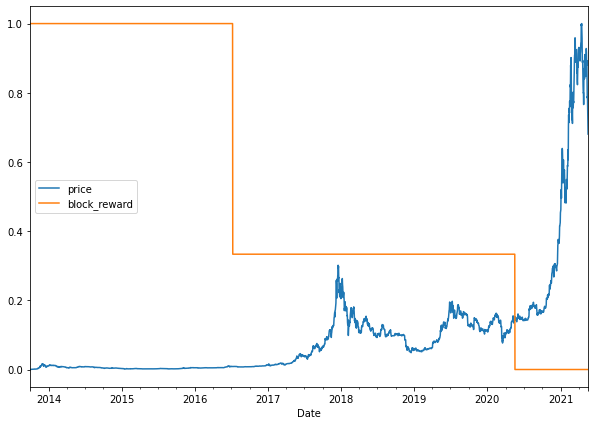

In [86]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['price','block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [87]:
HORIZON = 1
WINDOW_SIZE = 7

In [88]:
 bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [89]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i +1}'] = bitcoin_prices_windowed['price'].shift(periods=i+1)

In [90]:
bitcoin_prices_windowed.head()

,price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [91]:
X = bitcoin_prices_windowed.dropna().drop('price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['price'].astype(np.float32)

In [92]:
split_size = int(len(X) * 0.8)
X_train,y_train = X[:split_size], y[:split_size]
X_test,y_test = X[split_size:] , y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense(multivariate Time Series)

In [93]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,
            batch_size =128,
            epochs = 100,
            validation_data = (X_test,y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 37ms/step - loss: 1234.6881 - val_loss: 2061.8428
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 351.5003 - val_loss: 1908.7257
Epoch 3/100
18/18 [==============================] - 1s 29ms/step - loss: 235.4110 - val_loss: 1329.5310
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 208.6456 - val_loss: 1102.0128
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 196.5595 - val_loss: 1108.6157
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 187.2317 - val_loss: 1035.9969
Epoch 7/100
18/18 [==============================] - 0s 29ms/step - loss: 182.0119 - val_loss: 1019.2738
Epoch 8/100
18/18 [==============================] - 0s 29ms/step - loss: 175.6998 - val_loss: 977.7345
Epoch 9/100
18/18 [==============================] - 0s 27ms/step - loss: 170.1651 - val_loss: 953.9047
Epoch 10/100
18/18 [==============================] - 0s 

In [94]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 645.7142


645.7142333984375

In [95]:
model_6 = tf.keras.models.load_model('model_experiment/model_6_dense_multivariate/')
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.3345


568.33447265625

In [96]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8845.381 , 8769.115 , 9044.852 , 8745.515 , 8727.0625, 8773.182 ,
       8669.289 , 8502.578 , 8469.248 , 8527.997 ], dtype=float32)>

In [97]:
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)

model_6_results

{'mae': 568.33435,
 'mse': 1164858.9,
 'rmse': 23.839764,
 'mape': 2.549302,
 'mase': 0.99840605}

In [98]:
model_1_results

{'mae': 568.5498,
 'mse': 1172587.6,
 'rmse': 23.844282,
 'mape': 2.549229,
 'mase': 0.99878454}